In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("stroke.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
df.shape

(5110, 12)

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(4909, 12)

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [22]:
# Change Gender to Binary Variables (1/0)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})


In [23]:
# Change Ever Married to Binary Variables (1/0)
df['ever_married'] = df['ever_married'].fillna('No')
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [24]:
df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

The primary variables we will be analyzing are gender, age, hypertension, heart disease, avg_glucose_level, bmi, stroke, work type, and residence_type.  To define some of the more technical variables:
* Hypertension, or high blood pressure, is a condition where the force of the blood against the artery walls is consistently too high. It increases the risk of stroke, heart disease, and other health problems.

* Body Mass Index (BMI) is a numerical measure that assesses whether an individual has a healthy body weight relative to their height. To note: Underweight: < 18.5, Normal: 18.5 – 24.9, Overweight: 25 – 29.9, Obese: ≥ 30

* Avg_Glucose_LeveL: High glucose levels can be an indicator of diabetes, which is a major risk factor for stroke. To note: Normal: Less than 100 mg/dL, Pre-diabetes: 100–125 mg/dL, Diabetes: 126 mg/dL or higher

The rest of the variables will be taken into consideration when considering confounding variables when looking into correlation once we integrate our datasets.

In [25]:
df[["gender", "age", "hypertension", "heart_disease", "ever_married", "avg_glucose_level", "bmi", "stroke", "Residence_type"]].corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Residence_type
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.053664,-0.026678,0.006757,-0.005014
age,-0.030738,1.000000,0.274425,0.257123,0.680782,0.235838,0.333398,0.232331,0.010948
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,0.180543,0.167811,0.142515,-0.001074
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,0.154525,0.041357,0.137938,-0.002362
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,0.151377,0.341695,0.105089,0.004989
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,1.000000,0.175502,0.138936,-0.007617
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,0.175502,1.000000,0.042374,-0.000122
stroke,0.006757,0.232331,0.142515,0.137938,0.105089,0.138936,0.042374,1.000000,0.006031
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.007617,-0.000122,0.006031,1.000000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_ol

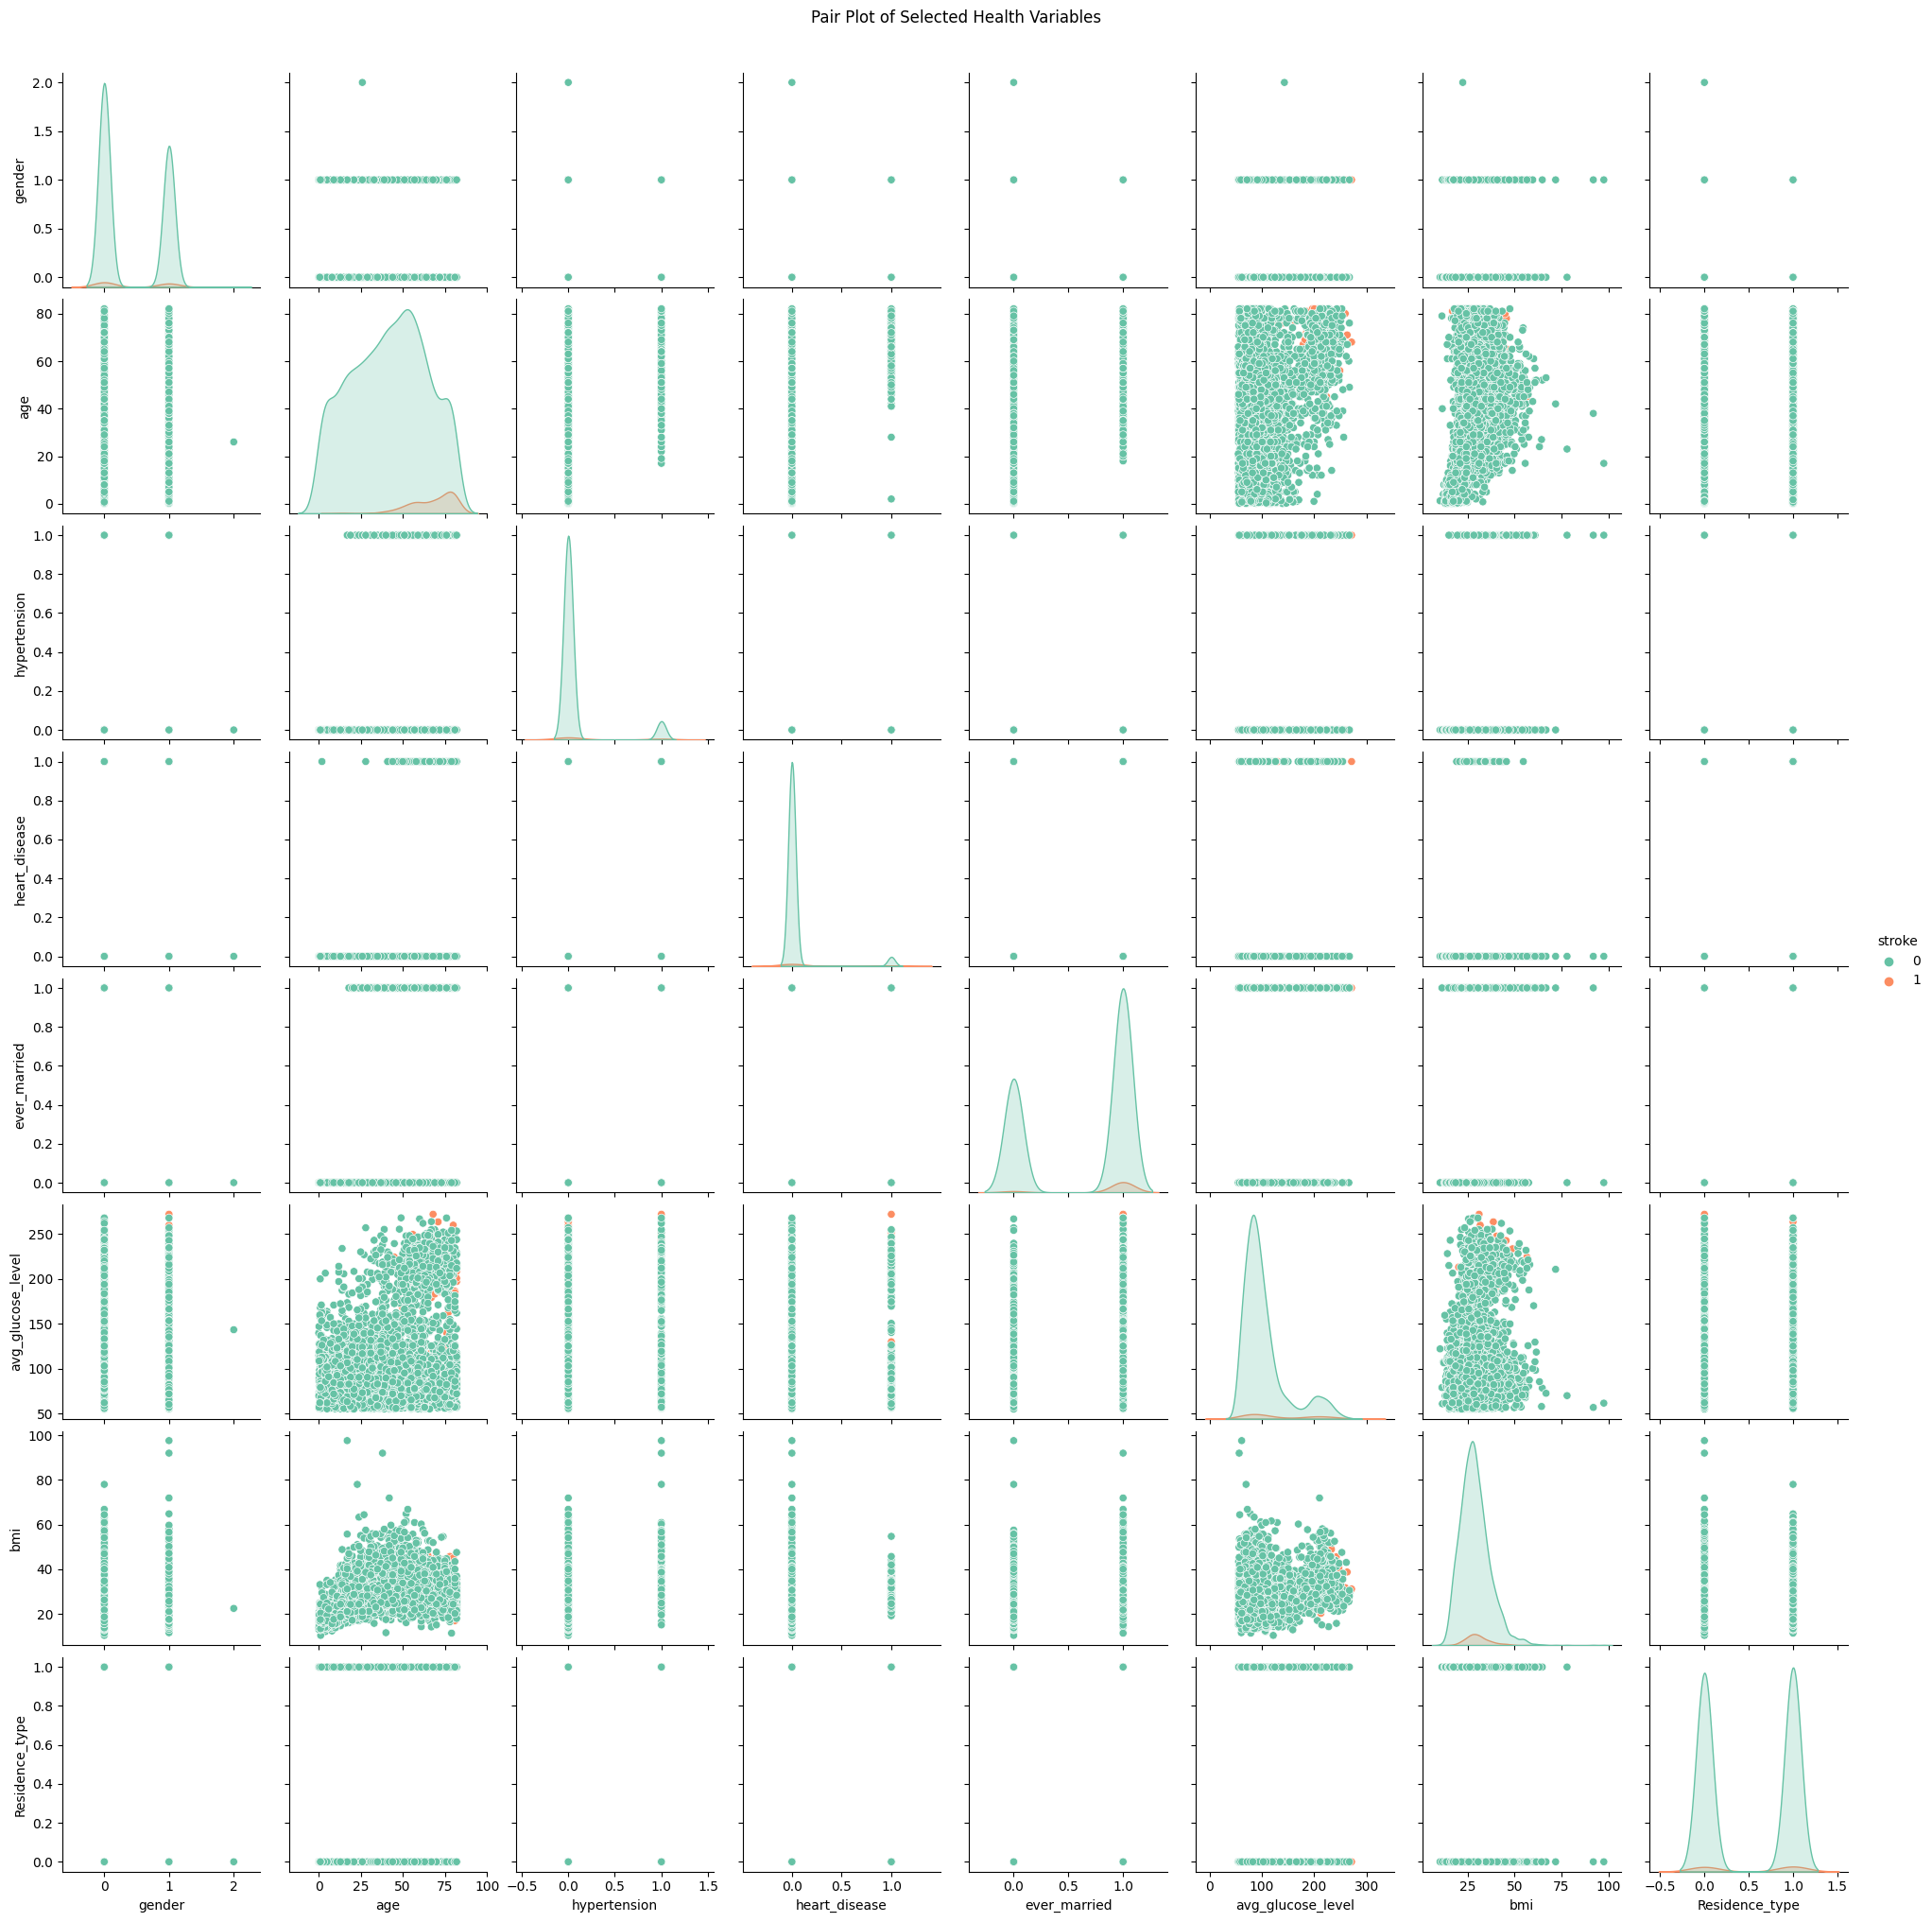

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ["gender", "age", "hypertension", "heart_disease", "ever_married",
                    "avg_glucose_level", "bmi", "stroke", "Residence_type"]
sns.pairplot(df[selected_columns], hue="stroke", palette="Set2", diag_kind="kde")
plt.suptitle("Pair Plot of Selected Health Variables", y=1.02)
plt.show()

Notes: 
* Hue="stroke": Colors the plots based on stroke (0 or 1).
* Diag_Kind="kde": Uses kernel density plots on the diagonals 